In [1]:
## Digits

In [2]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from gympy.layers import Linear, Relu, Sigmoid, Softmax, Tanh
from gympy.networks import NeuralNetwork, DataSet
from gympy.optimizers import Adam, TimeDecay, ExponentialDecay
from gympy.loss import CategoricalCrossEntropy, Accuracy
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
digits = load_digits()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
X_train.shape

(1347, 64)

In [5]:
Y = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1,1)).T
Y.shape

(10, 1347)

In [6]:
X = StandardScaler().fit_transform(X_train).T
print(X.shape)


(64, 1347)


In [7]:

n_iter=390
model = NeuralNetwork(
    layers = [
        Tanh(n_input=64, n_output=32, dropout_rate=0.0),
        Softmax(n_input=32, n_output=10)
    ],
    optimizer = Adam(
        learning_rate=0.02, 
        beta1=0.8, 
        beta2=0.88,
        decay= ExponentialDecay(rate=0.95)
        ),
    loss = CategoricalCrossEntropy(),
    n_iter=n_iter
)

In [8]:
tt = model.forward(X[:,0:1])
tt

array([[0.10161022],
       [0.09877776],
       [0.10044242],
       [0.09868257],
       [0.09923166],
       [0.10101767],
       [0.10064498],
       [0.09916973],
       [0.10199545],
       [0.09842755]])

In [9]:
yy = Y[:,0:1]
yy

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [10]:
np.log(0.5)

-0.6931471805599453

In [11]:
CategoricalCrossEntropy().forward(tt, Y[:,0:1])

2.2828271020538233

In [12]:

dataset = DataSet(
    x = X,
    y = Y,
    batch_size=64
)


In [13]:
for i in model.get_bias():
    print(i.shape)

(32, 1)
(10, 1)


0 cost 0.3594129577834666 iter 22
1 cost 0.22725011887208055 iter 43
2 cost 0.1367458518421654 iter 64
3 cost 0.08162869002355316 iter 85
4 cost 0.05267198451833701 iter 106
5 cost 0.03799566957994774 iter 127
6 cost 0.0297673160194393 iter 148
7 cost 0.024506127266722643 iter 169
8 cost 0.020800609331711212 iter 190
9 cost 0.018056601390129025 iter 211


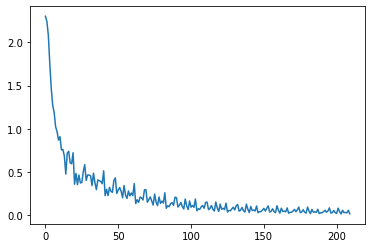

In [14]:
n_iter=5000
model.train_dataset(dataset, show=1, n_epochs=10)
plt.plot(model.cost)

In [15]:
model.forward(X[:,[453]])

array([[1.44455803e-05],
       [9.91539294e-01],
       [7.27658702e-03],
       [1.65861752e-05],
       [1.01213765e-04],
       [5.83256829e-05],
       [8.39493367e-04],
       [1.41043315e-06],
       [1.42975659e-04],
       [9.66833520e-06]])

In [16]:
test_idx = np.random.choice(X.shape[1],16, replace=False)

In [17]:
prob = model.forward(X[:,test_idx])
pred = np.argmax(prob,axis=0)

true_vals = np.argmax(Y[:,test_idx], axis=0)

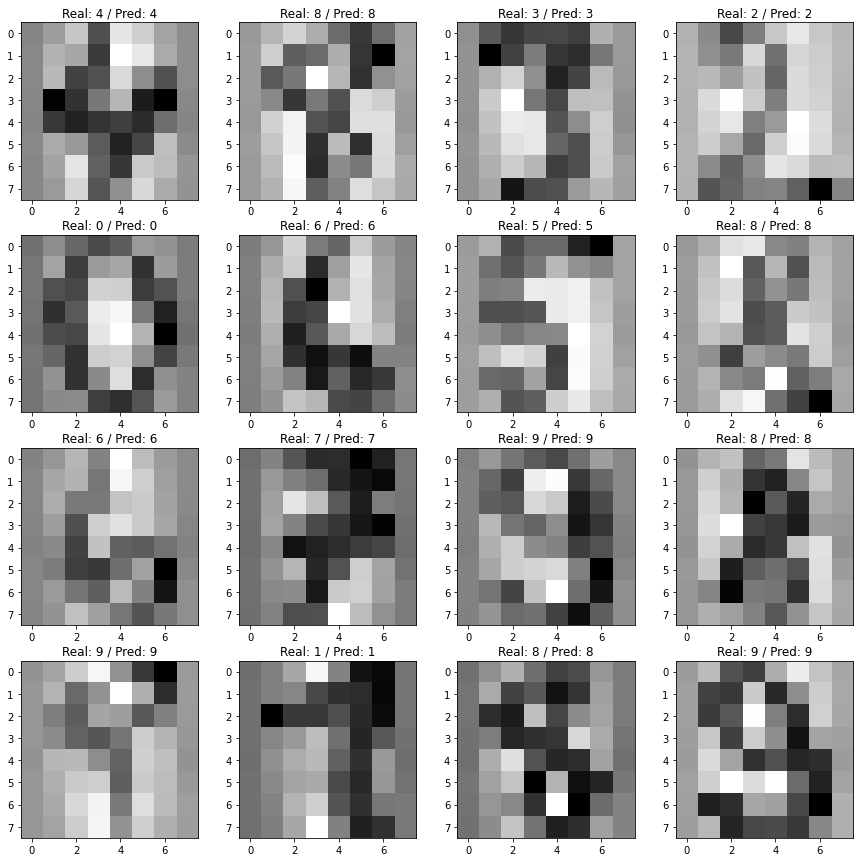

In [18]:
fig, axes = plt.subplots(4,4, figsize=(15,15))

for i,(idx, ax) in enumerate(zip(test_idx, axes.flatten())):
    ax.imshow(X[:,idx].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Real: {true_vals[i]} / Pred: {pred[i]}')

In [19]:
prob_total = model.forward(X)
pred_total = np.argmax(prob_total,axis=0)
true_vals_total = np.argmax(Y, axis=0)

acc = Accuracy()
acc.forward(prob_total, Y)

0.9962880475129918

In [26]:
dataset.shuffle_index[0]

array([1291,  748,  256,  480,  104,  555,  116,  319,  850,   44,  605,
        122,  992,   77,  698,  787,  457,  595,  958,  115,  649,  781,
        575, 1278,  715,  896,   15,  808,  198,  296,  793, 1209, 1090,
        720,   98, 1282,  482, 1157,  745,  378,  210,  108, 1013, 1021,
       1237, 1087,  458, 1321, 1328,  863,  528,  155, 1085,  329, 1091,
        561,   14,  993,  471,   52,  762, 1270,   67,  284, 1320])

In [28]:
np.array_split(np.arange(20), 3)

[array([0, 1, 2, 3, 4, 5, 6]),
 array([ 7,  8,  9, 10, 11, 12, 13]),
 array([14, 15, 16, 17, 18, 19])]